In [1]:
library(dplyr)
library(here)
library(arrow)
library(conflicted)
conflicts_prefer(dplyr::filter)

df <- here("data", "goemotions_decoded.feather") %>%
  read_feather()
df %>% head


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


here() starts at C:/Users/plancha/emotion-recognition

The tzdb package is not installed. Timezones will not be available to Arrow compute functions.


Attaching package: 'arrow'


The following object is masked from 'package:utils':

    timestamp


[conflicted] Will prefer dplyr::filter over any other package.


text                                                                                                                                   
1 That game hurt.                                                                                                                        
2 >sexuality shouldn’t be a grouping category It makes you different from othet ppl so imo it fits the definition of "grouping"          
3 You do right, if you don't care then fuck 'em!                                                                                         
4 Man I love reddit.                                                                                                                     
5 [NAME] was nowhere near them, he was by the Falcon.                                                                                    
6 Right? Considering it’s such an important document, I should know the damned thing backwards and forwards... thanks again for the help!
  id      author              subreddit           link_id   parent_id 
1 eew5j0j Brdd9               nrl                 t3_ajis4z t1_eew18eq
2 eemcysk TheGreen888         unpopularopinion    t3_ai4q37 t3_ai4q37 
3 ed2mah1 Labalool            confessions         t3_abru74 t1_ed2m7g7
4 eeibobj MrsRobertshaw       facepalm            t3_ahulml t3_ahulml 
5 eda6yn6 American_Fascist713 starwarsspeculation t3_ackt2f t1_eda65q2
6 eespn2i ImperialBoss        TrueReddit          t3_aizyuz t1_eesoak0
  created_utc rater_id example_very_unclear decoded  
1 1548381039   1       FALSE                sadness  
2 1548084169  37        TRUE                         
3 1546427744  37       FALSE                neutral  
4 1547965054  18       FALSE                love     
5 1546668601   2       FALSE                neutral  
6 1548280208  61       FALSE                gratitude

# Replace unclear with neutral

because that's what raters were asked to do

In [2]:
library(tidyr)
library(purrr)
conflicts_prefer(vctrs::list_of)
df %>% 
  mutate(
    decoded = decoded %>% as.list %>% ifelse(length(.) > 0, ., list("neutral")),
    emotions = decoded # save to another column
  ) %>% 
  unnest(decoded) %>% 
  mutate(value = 1) %>% 
  pivot_wider(
    names_from = decoded,
    values_from = value,
    values_fill = 0
  ) %>% 
  select(-example_very_unclear) -> df_e
df_e %>% head

[conflicted] Will prefer vctrs::list_of over any other package.


text                                                                                                                                   
1 That game hurt.                                                                                                                        
2 >sexuality shouldn’t be a grouping category It makes you different from othet ppl so imo it fits the definition of "grouping"          
3 You do right, if you don't care then fuck 'em!                                                                                         
4 Man I love reddit.                                                                                                                     
5 [NAME] was nowhere near them, he was by the Falcon.                                                                                    
6 Right? Considering it’s such an important document, I should know the damned thing backwards and forwards... thanks again for the help!
  id      author              subreddit           link_id   parent_id 
1 eew5j0j Brdd9               nrl                 t3_ajis4z t1_eew18eq
2 eemcysk TheGreen888         unpopularopinion    t3_ai4q37 t3_ai4q37 
3 ed2mah1 Labalool            confessions         t3_abru74 t1_ed2m7g7
4 eeibobj MrsRobertshaw       facepalm            t3_ahulml t3_ahulml 
5 eda6yn6 American_Fascist713 starwarsspeculation t3_ackt2f t1_eda65q2
6 eespn2i ImperialBoss        TrueReddit          t3_aizyuz t1_eesoak0
  created_utc rater_id emotions <NA>    <NA>    <NA>    <NA>    <NA>    sadness
1 1548381039   1       sadness  sadness sadness sadness sadness sadness 1      
2 1548084169  37       sadness  sadness sadness sadness sadness sadness 1      
3 1546427744  37       sadness  sadness sadness sadness sadness sadness 1      
4 1547965054  18       sadness  sadness sadness sadness sadness sadness 1      
5 1546668601   2       sadness  sadness sadness sadness sadness sadness 1      
6 1548280208  61       sadness  sadness sadness sadness sadness sadness 1

In [23]:
df %>% as_tibble() %>% 
  mutate(decoded = ifelse(length(decoded) > 0, decoded %>% as.list, list("neutral"))) -> temp
temp %>% str

tibble [211,225 × 10] (S3: tbl_df/tbl/data.frame)
 $ text                : chr [1:211225] "That game hurt." ">sexuality shouldn’t be a grouping category It makes you different from othet ppl so imo it fits the definition"| __truncated__ "You do right, if you don't care then fuck 'em!" "Man I love reddit." ...
 $ id                  : chr [1:211225] "eew5j0j" "eemcysk" "ed2mah1" "eeibobj" ...
 $ author              : chr [1:211225] "Brdd9" "TheGreen888" "Labalool" "MrsRobertshaw" ...
 $ subreddit           : chr [1:211225] "nrl" "unpopularopinion" "confessions" "facepalm" ...
 $ link_id             : chr [1:211225] "t3_ajis4z" "t3_ai4q37" "t3_abru74" "t3_ahulml" ...
 $ parent_id           : chr [1:211225] "t1_eew18eq" "t3_ai4q37" "t1_ed2m7g7" "t3_ahulml" ...
 $ created_utc         : num [1:211225] 1.55e+09 1.55e+09 1.55e+09 1.55e+09 1.55e+09 ...
 $ rater_id            : num [1:211225] 1 37 37 18 2 61 3 23 73 54 ...
 $ example_very_unclear: logi [1:211225] FALSE TRUE FALSE FALSE FALSE FA

In [13]:
ddf <- tibble(
  x = list(1, 2:3, 4:6)
)
ddf %>% print

# A tibble: 3 × 1
  x        
  <list>   
1 <dbl [1]>
2 <int [2]>
3 <int [3]>


In [ ]:
list_of("neutral") %>% print

<list_of<character>[1]>
[[1]]
[1] "neutral"



In [8]:
library(vctrs)
df %>% 
  mutate(decoded = decoded %>% vec_cast(character())) -> temp
temp$decoded

ERROR: [1m[33mError[39m in `mutate()`:[22m
[1m[22m[36mℹ[39m In argument: `decoded = decoded %>% vec_cast(character())`.
[1mCaused by error:[22m
[33m![39m Can't convert `.` <list<character>> to <character>.


In [3]:
df$decoded %>% class

[1] "arrow_list"    "vctrs_list_of" "vctrs_vctr"    "list"

# Joining raters
There are various ways of joining raters to produce a confidence target, all of them with their advantages, disanvantages and assumptions. Here's some:

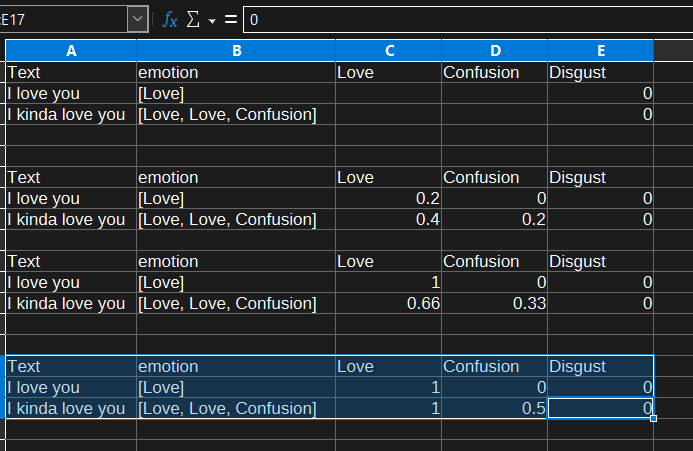

1. Based on rater number: more rater == more confidence on the prediction
  - While intuitive, the downside is that even comments that are clearly an emotion might get low confidence because a low amount of raters rated them
2. Based on emotion classification percentage
  - This assumes that there's a prevelant emotion for a comment, with the main objective of only predicting one emotion per comment, instead of possible emotions.
  - This also means that the less ambiguous emotion comments also have a higher confidence on the motion it is
  - Additionally, it gives more confidence to less raters
3. Based on emotion classificaiton count
  - This assumes that comments can be more than one emotion, and everytime a rater gives an emotion it ads to that confidence proportionally to the amount of raters
  - This also gives more confidence to less raters

We ultimately decided on approach 3

In [ ]:
library(purrr)
library(tibble)
df_er <- df_e %>% 
  group_by(id) %>% 
  summarise(
    text = first(text),
    raters = n(),
    emotions = list(emotions),
  ) %>% 
  rowwise() %>% 
  mutate(
    emotions = list_of(unlist(emotions))
  )

df_er %>% head %>% print

ERROR: Error: object 'df_e' not found


In [38]:
df_er$emotions[30] %>% print

[[1]]
[1] "pride"   "neutral" "neutral"

